# Question 4

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import random as rm
import seaborn as sns; 
import imageio
import cv2
import sympy
from pylab import imread, imshow, gray, mean
import sklearn
import math
import scipy.io as sio
import skimage
import sys


# Question 4 i)
### Calculate and list the rotation (in degrees) and translation values (in pixel units) of the rigid transformation (use the opencv library) between the test and gold standard images 

In [3]:
_data = sio.loadmat('data.mat') # Change to the path of the data.mat file 
# Get the test and gold standard images
test_images = _data['test_img']
gold_images = _data['gold_img']

In [4]:

warp_mode = cv2.MOTION_EUCLIDEAN
number_of_iterations = 500
termination_eps = 1e-10
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

# Initialize dictionaries to store values for each view and measurement
test_gold_alignedImage = {view: {'rotation': [], 'displacement': []} for view in range(10)}

# Loop through each gold standard image
for i in range(gold_images.shape[1]):
    for j in range(test_images.shape[0]):
        # Skip empty arrays and ignore scores of -1
        if test_images[j][i].size == 0:
            continue
            
        warp_matrix = np.eye(2, 3, dtype=np.float32)
        (cc, warp_matrix) = cv2.findTransformECC(gold_images[0][i], test_images[j][i] ,warp_matrix, warp_mode, criteria)
            
        rotation = np.arctan2(warp_matrix[1,0], warp_matrix[0,0])*180/np.pi
        mX = warp_matrix[0,2]
        mY = warp_matrix[1,2]
        displacement = np.sqrt(mX**2 + mY**2)
        
        test_gold_alignedImage[i]['rotation'].append(rotation)
        test_gold_alignedImage[i]['displacement'].append(displacement)

In [5]:
for view in range(10):
    print(f"View {view+1}:")
    for measure in ['rotation', 'displacement']:
        print(f"{measure}: {test_gold_alignedImage[view][measure]}\n")

View 1:
rotation: [-3.7562463123492336, -1.3650864099955087, 0.2850283830979807, 0.2794316567229635, -1.9740446253309833, 2.6506730465900654, -3.657640578849052, -0.6149080037936435, -1.0374225987161332, -19.142887516977403, 0.44110295474867933, 5.690034229598985, -1.6022657961412592, 7.831568326870198, 2.215830760628496, -3.414093321962734, -3.7193577413024643, -3.3072992588647647, 1.6410668201556322]

displacement: [29.916117843158837, 2.913329947824175, 3.0767223853043593, 5.848156188479508, 10.215220274826056, 16.65185073689778, 22.14720931453405, 4.066086070918436, 9.827441831411319, 72.02104920268485, 2.6254790259156215, 36.26089306681, 7.3724767245322225, 39.42693545808783, 9.12148365164665, 16.72918763657449, 15.430193304377234, 17.22166155102395, 11.451380829749066]

View 2:
rotation: [0.6954574385318087, 0.4131576092855424, 4.338522073526936, -1.6878271489871859, -3.3434202874035543, 3.089291146502182, 6.461945497327037, 2.9141811044389225, 5.341893084301089, -0.8037556373510

# Question 4 ii)
### ii) For each view develop a hypothesis and perform a test to evaluate the differences between the expert and novice groups in terms of the values of rotation and translation. List and discus your results in terms of significance.

In [6]:
warp_mode = cv2.MOTION_EUCLIDEAN
number_of_iterations = 500
termination_eps = 1e-10
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)


# Initialize dictionaries to store similarity values for each view and measure
expert_similar_images = {view: {'rotation': [], 'displacement': []} for view in range(10)}
novice_similar_images = {view: {'rotation': [], 'displacement': []} for view in range(10)}

# Loop through each gold standard image and calculate similarity values for each test image
for i in range(gold_images.shape[1]):
    for j in range(test_images.shape[0]):
        # Skip empty arrays and ignore scores of -1
        if test_images[j][i].size == 0:
            continue

        # Calculate  rotation (in degrees) and translation values (in pixel units) of the rigid transformation
                    
        warp_matrix = np.eye(2, 3, dtype=np.float32)
        (cc, warp_matrix) = cv2.findTransformECC(gold_images[0][i], test_images[j][i],warp_matrix, warp_mode, criteria)
            
        #warp_matrix = align_images(gold_images[0][i], test_images[j][i])
        
        rotation = np.arctan2(warp_matrix[1,0], warp_matrix[0,0])*180/np.pi
        mX = warp_matrix[0,2]
        mY = warp_matrix[1,2]
        displacement = np.sqrt(mX**2 + mY**2)
        
        # Store similarity values in expert or novice dictionaries based on participant number
        if j < 7:
            expert_similar_images[i]['rotation'].append(rotation)
            expert_similar_images[i]['displacement'].append(displacement)
        else:
            novice_similar_images[i]['rotation'].append(rotation)
            novice_similar_images[i]['displacement'].append(displacement)




In [8]:
# Perform independent samples t-tests for each view and measure
for view in range(10):
    print(f"\nView {view+1}:")
    for measure in ['rotation', 'displacement']:
        expert_values = np.array(expert_similar_images[view][measure])
        novice_values = np.array(novice_similar_images[view][measure])
        expert_mean = np.mean(expert_values)
        novice_mean = np.mean(novice_values)
        print(f"\t{measure}:")
        print(f"\t\tExpert mean: {expert_mean:.4f}")
        print(f"\t\tNovice mean: {novice_mean:.4f}")
        
        use_mannwhitney = False
        
        
        # Test for normality using Shapiro-Wilk test
        stat, p = stats.shapiro(expert_values)
        if p > 0.05:
            print("\t\tExpert data is normally distributed")
        else:
            print("\t\tExpert data is not normally distributed")
            use_mannwhitney = True
        
        stat, p = stats.shapiro(novice_values)
        if p > 0.05:
            print("\t\tNovice data is normally distributed")
        else:
            print("\t\tNovice data is not normally distributed")
            use_mannwhitney = True
            
        
        if use_mannwhitney:
            u, p = stats.mannwhitneyu(expert_similar_images[view][measure], novice_similar_images[view][measure])
            print(f"\t\tMann-Whitney U test = {u:.4f}, p = {p:.4f}")
        else:
            t, p = stats.ttest_ind(expert_similar_images[view][measure], novice_similar_images[view][measure])
            print(f"\t\tsamples t-test = {t:.4f}, p = {p:.4f}")
        
        
        
        if p < 0.05:
            print("\t\tThe difference between experts and novices is statistically significant---------------")
        else:
            print("\t\tThe difference between experts and novices is not statistically significant")
        
        
   


View 1:
	rotation:
		Expert mean: -1.0768
		Novice mean: -1.2516
		Expert data is normally distributed
		Novice data is not normally distributed
		Mann-Whitney U test = 36.0000, p = 0.6504
		The difference between experts and novices is not statistically significant
	displacement:
		Expert mean: 12.9669
		Novice mean: 20.1295
		Expert data is normally distributed
		Novice data is not normally distributed
		Mann-Whitney U test = 34.0000, p = 0.5358
		The difference between experts and novices is not statistically significant

View 2:
	rotation:
		Expert mean: 1.4239
		Novice mean: 0.9900
		Expert data is normally distributed
		Novice data is normally distributed
		samples t-test = 0.3125, p = 0.7583
		The difference between experts and novices is not statistically significant
	displacement:
		Expert mean: 13.6232
		Novice mean: 9.1432
		Expert data is not normally distributed
		Novice data is normally distributed
		Mann-Whitney U test = 58.0000, p = 0.3507
		The difference between expe

## Question 4 iii)
### Perform linear regression for the rotation and translation against both the criteria percentage and general impression (rotation/translation – independent, manual scores – dependent) for each view. Calculate and list the RMSE and R2 scores of your regression. Identify the three views for which the linear regression performs better in every combination of independent/dependent variables. Plot the regression output only for the three best performing cases.

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
gen_impr = _data['gen_impr']
crit_perc = _data['crit_perc']

# Initialize dictionaries to store regressions for each view and measure
regressions = {view: {'rotation': [], 'displacement': []} for view in range(10)}

# Loop through each view and measure and perform polynomial regression
for i in range(10):
    print(f"\n\t{i+1}:")
    for measure in ['rotation', 'displacement']:
        # Get the independent and dependent variables
        x = np.array(test_gold_alignedImage[i][measure])
        y1 = np.array(crit_perc[:, i])
        y2 = np.array(gen_impr[:, i])
        print(f"\n\t{measure}:")
        # Remove the entries with -1 scores
        y1 = y1[y1 != -1]
        y2 = y2[y2 != -1]

        # Fit a Linear regression model
        poly_reg1 = LinearRegression()
        poly_reg2 = LinearRegression()

        poly_reg1.fit(x.reshape(-1,1), y1.reshape(-1,1))
        poly_reg2.fit(x.reshape(-1,1), y2.reshape(-1,1))
        
        y1_pred = poly_reg1.predict(x.reshape(-1,1))
        y2_pred = poly_reg2.predict(x.reshape(-1,1))
        
          # Calculate the RMSE and R2 scores
        rmse_1 = mean_squared_error(y1, y1_pred, squared=False)
        r2_1 = r2_score(y1, y1_pred)
        print(f"View {i+1}: RMSE = {rmse_1:.5f}, R2 = {r2_1:.5f}, crit_perc")
        
        rmse_2 = mean_squared_error(y2, y2_pred, squared=False)
        r2_2 = r2_score(y2, y2_pred)
        print(f"View {i+1}: RMSE = {rmse_2:.5f}, R2 = {r2_2:.5f}, gen_impr")

              
        # Predict the dependent variable using the trained regression model
        x_fit = np.linspace(x.min(), x.max(), len(x))
        y1_pred = poly_reg1.predict(x_fit.reshape(-1,1))
        y2_pred = poly_reg2.predict(x_fit.reshape(-1,1))
        
        #Store regressions in dictionary
        regressions[i][measure] = [x, y1, y2, x_fit, y1_pred, y2_pred, rmse_1, r2_1, rmse_2, r2_2]
 


	1:

	rotation:
View 1: RMSE = 15.40762, R2 = 0.03492, crit_perc
View 1: RMSE = 0.72710, R2 = 0.09310, gen_impr

	displacement:
View 1: RMSE = 15.47351, R2 = 0.02664, crit_perc
View 1: RMSE = 0.73421, R2 = 0.07527, gen_impr

	2:

	rotation:
View 2: RMSE = 14.52477, R2 = 0.02879, crit_perc
View 2: RMSE = 0.75736, R2 = 0.07122, gen_impr

	displacement:
View 2: RMSE = 13.64052, R2 = 0.14344, crit_perc
View 2: RMSE = 0.78573, R2 = 0.00033, gen_impr

	3:

	rotation:
View 3: RMSE = 14.46198, R2 = 0.24678, crit_perc
View 3: RMSE = 0.67421, R2 = 0.19898, gen_impr

	displacement:
View 3: RMSE = 16.20482, R2 = 0.05429, crit_perc
View 3: RMSE = 0.72300, R2 = 0.07886, gen_impr

	4:

	rotation:
View 4: RMSE = 17.06154, R2 = 0.19078, crit_perc
View 4: RMSE = 0.79534, R2 = 0.06498, gen_impr

	displacement:
View 4: RMSE = 18.95958, R2 = 0.00072, crit_perc
View 4: RMSE = 0.81013, R2 = 0.02986, gen_impr

	5:

	rotation:
View 5: RMSE = 18.66780, R2 = 0.02159, crit_perc
View 5: RMSE = 0.90747, R2 = 0.003

## Selecting the best three views based on the combination of R2 score and RMSE values for each view

[3 7 4]
Top three views based on the combination of R2 score and RMSE values for each view:
View 5
View 8
View 4


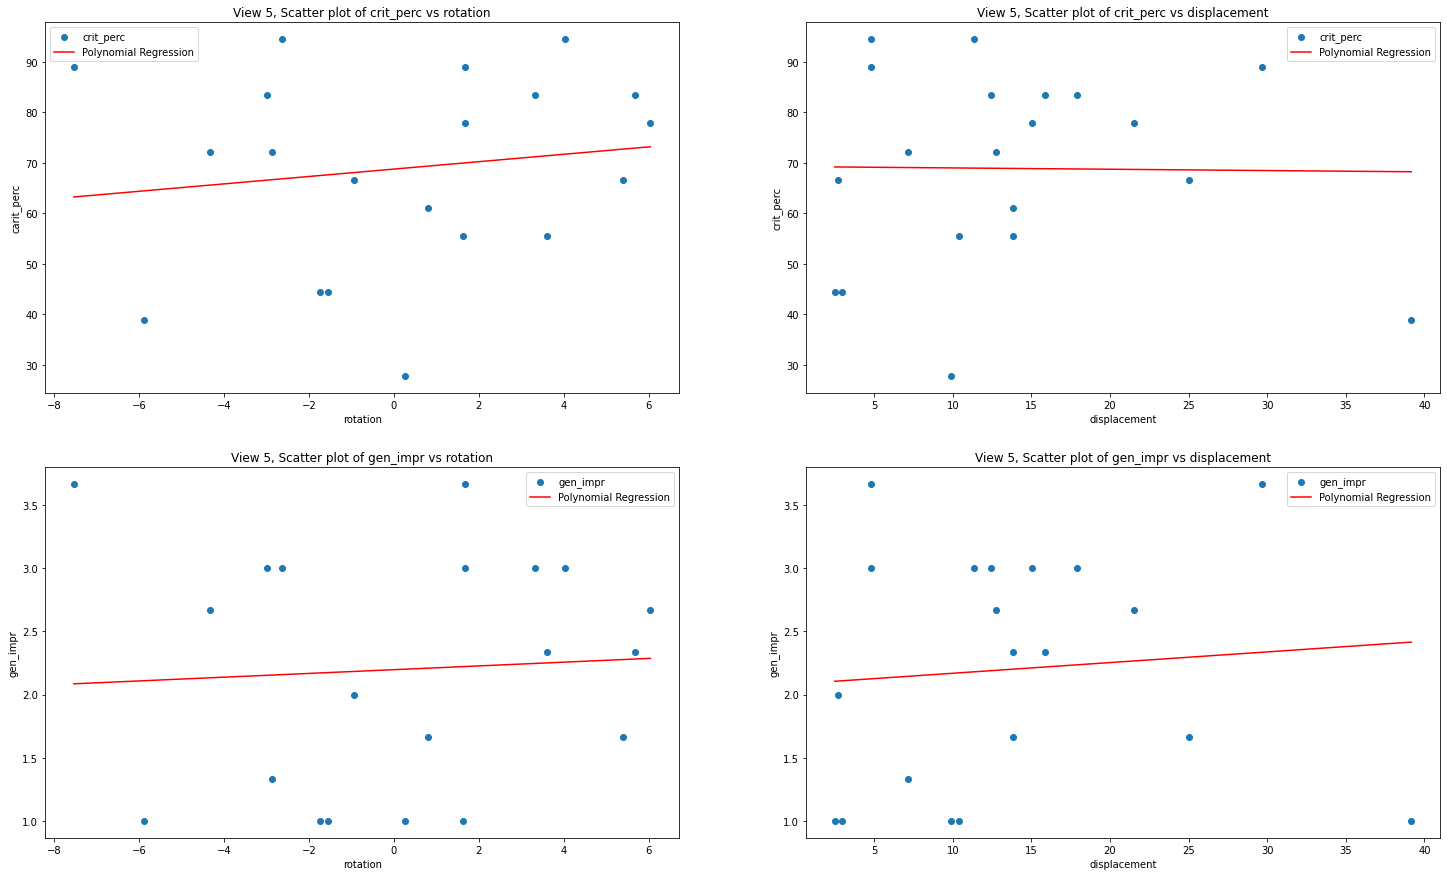

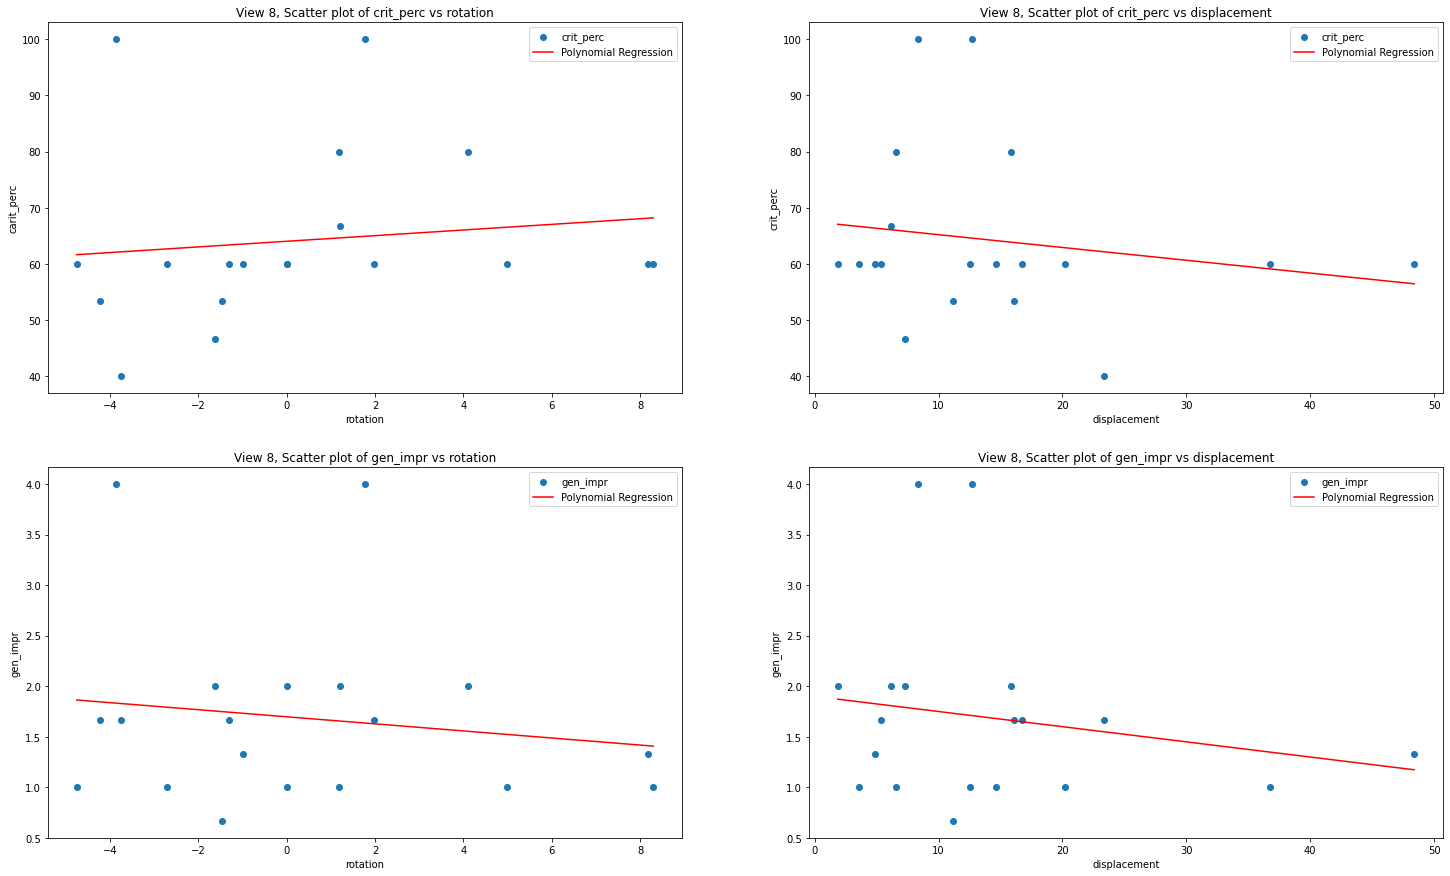

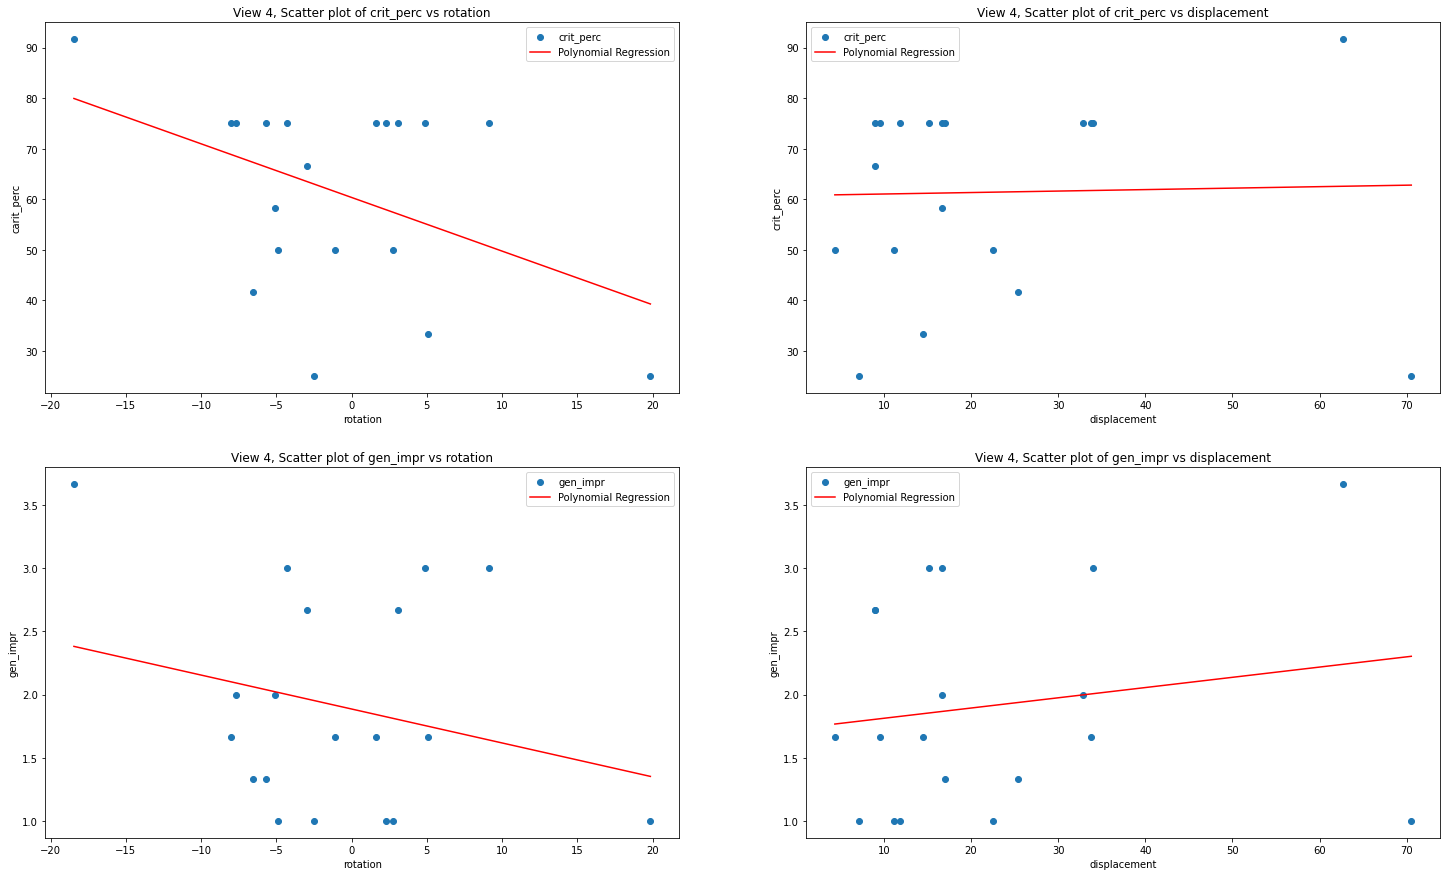

In [41]:
rmse = np.zeros((4, 10))
r2 = np.zeros((4, 10))
# for each view
for j in range(10):
    # for each plot in view get the 6 RMSE values and 6 R2 values 
    counter = 0
    for measure in ['rotation', 'displacement']:
        rmse[counter, j] = regressions[j][measure][6]
        rmse[counter+1, j] = regressions[j][measure][8]
        r2[counter, j] = regressions[j][measure][7]
        r2[counter+1, j] = regressions[j][measure][9]
        counter += 2
# scale rmse to 0 and 1
rmse = (rmse - np.min(rmse)) / np.max(rmse - np.min(rmse))
# flip rmse, so larger is better
rmse = 1 - rmse
# scale r2 to 0 and 1
r2 = (r2- np.min(r2)) / np.max(r2- np.min(r2))

# weigh them, get score
weight = 0.4
score = (1 - weight)* rmse + weight * r2

# find top 3 view. i.e. columns in this case
# first find the best for each view
top_each_view = np.argmax(score, axis=0)
# then find the best 3 views
# https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array
indices = np.argpartition(top_each_view, -2)[-3:]
print(indices)
print("Top three views based on the combination of R2 score and RMSE values for each view:")
for view in indices[::-1]:
    makePlots(regressions, view)

## Below is a function i used to help me in displaying the plots

In [12]:
def makePlots(regressions, i):
        # Plot the scatter plot of the predicted values against the original values
    print(f"View {i+1}")
    fig, axs = plt.subplots(2, 2, figsize=(25,15))

    # Plot 1
    axs[0,0].scatter(regressions[i]['rotation'][0], regressions[i]['rotation'][1], label='crit_perc')
    axs[0,0].plot(regressions[i]['rotation'][3], regressions[i]['rotation'][4], color='red', label='Polynomial Regression')
    axs[0,0].set_xlabel('rotation')
    axs[0,0].set_ylabel('carit_perc')
    axs[0,0].set_title(f'View {i+1}, Scatter plot of crit_perc vs rotation')
    axs[0,0].legend()

    # Plot 2
    axs[0,1].scatter(regressions[i]['displacement'][0], regressions[i]['displacement'][1], label='crit_perc')
    axs[0,1].plot(regressions[i]['displacement'][3], regressions[i]['displacement'][4], color='red', label='Polynomial Regression')
    axs[0,1].set_xlabel('displacement')
    axs[0,1].set_ylabel('crit_perc')
    axs[0,1].set_title(f'View {i+1}, Scatter plot of crit_perc vs displacement')
    axs[0,1].legend()

    
    # Plot 4
    axs[1,0].scatter(regressions[i]['rotation'][0], regressions[i]['rotation'][2], label='gen_impr')
    axs[1,0].plot(regressions[i]['rotation'][3], regressions[i]['rotation'][5], color='red', label='Polynomial Regression')
    axs[1,0].set_xlabel('rotation')
    axs[1,0].set_ylabel('gen_impr')
    axs[1,0].set_title(f'View {i+1}, Scatter plot of gen_impr vs rotation')
    axs[1,0].legend()

    # Plot 5
    axs[1,1].scatter(regressions[i]['displacement'][0], regressions[i]['displacement'][2], label='gen_impr')
    axs[1,1].plot(regressions[i]['displacement'][3], regressions[i]['displacement'][5], color='red', label='Polynomial Regression')
    axs[1,1].set_xlabel('displacement')
    axs[1,1].set_ylabel('gen_impr')
    axs[1,1].set_title(f'View {i+1}, Scatter plot of gen_impr vs displacement')
    axs[1,1].legend()
    
   


In [ ]:
#Import packages
import sys
sys.path.append('/usr/local/lib/python2.7/site-packages')

#from skimage.measure import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tkinter import Tk
from tkinter.simpledialog import askinteger
from tkinter.simpledialog import askfloat
from tkinter.filedialog import asksaveasfilename

Tk().withdraw()

#ALIGN_IMAGES
def align_images(im1, im2):

	# Convert images to grayscale5
	im1_gray = im1 #cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
	im2_gray = im2 #cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
 
	# Find size of image1
	sz = im1.shape

	# Define the motion model
	warp_mode = cv2.MOTION_EUCLIDEAN
	
	#Define the warp matrix
	warp_matrix = np.eye(2, 3, dtype=np.float32)

	#Define the number of iterations
	number_of_iterations = 500 #askinteger("Iterations", "Enter a number between 5 andd 5000",initialvalue=500,minvalue=5,maxvalue=5000)

	#Define correllation coefficient threshold
	#Specify the threshold of the increment in the correlation coefficient between two iterations
	termination_eps = 1e-10 #askfloat("Threshold", "Enter a number between 1e-10 and 1e-50",initialvalue=1e-10,minvalue=1e-50,maxvalue=1e-10)

	#Define termination criteria
	criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
 
	#Run the ECC algorithm. The results are stored in warp_matrix.
	(cc, warp_matrix) = cv2.findTransformECC(im1_gray, im2_gray,warp_matrix, warp_mode, criteria)
	return warp_matrix
